In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Sử dụng pandas để đọc dữ liệu

In [ ]:
df = pd.read_csv('/content/Case_study_CarPrice_Assignment.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [ ]:
df['Brand'] = df['CarName'].str.split(' ').str[0]

# Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu

In [ ]:
df['doornumber'].replace({'two':2,'four':4},inplace=True)

In [ ]:
df['cylindernumber'].replace({'six':6,'four':4,'five':5,'three':3,'twelve':12,'two':2,'eight':8},inplace=True)

# Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định

## Fueltype

In [ ]:
df_fueltype = df.groupby('fueltype')['price'].mean().reset_index()

<Axes: xlabel='fueltype', ylabel='price'>

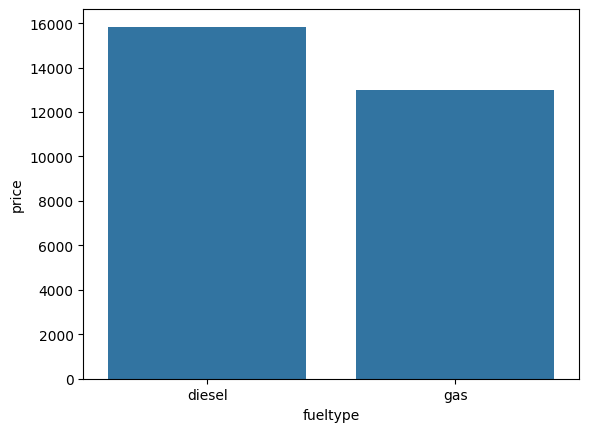

In [ ]:
sns.barplot(x='fueltype',y='price',data=df_fueltype)

## Aspiration

In [ ]:
df_aspiration = df.groupby('aspiration')['price'].mean().reset_index()

<Axes: xlabel='aspiration', ylabel='price'>

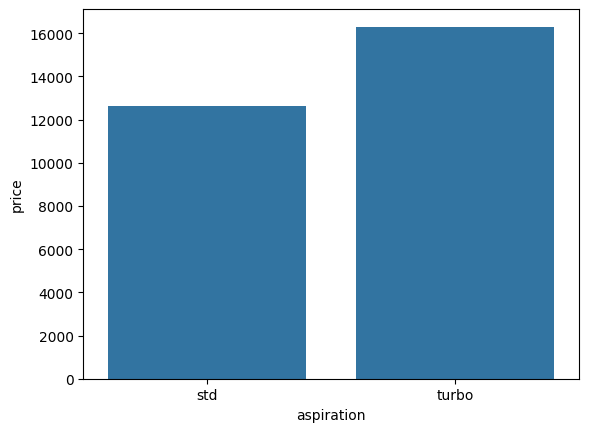

In [ ]:
sns.barplot(x='aspiration',y='price',data=df_aspiration)

## Doornumber

In [ ]:
df_doornumber = df.groupby('doornumber')['price'].mean().reset_index()

<Axes: xlabel='doornumber', ylabel='price'>

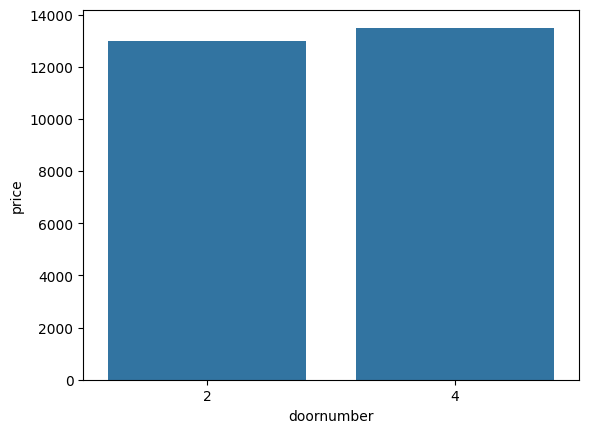

In [ ]:
sns.barplot(x='doornumber',y='price',data=df_doornumber)

## Carbody

In [ ]:
df_carbody = df.groupby('carbody')['price'].mean().reset_index()

<Axes: xlabel='carbody', ylabel='price'>

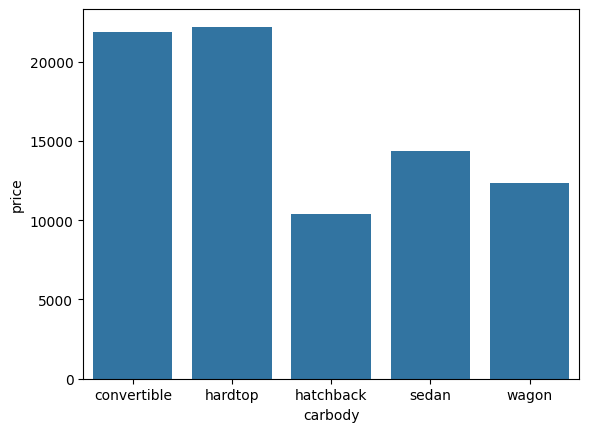

In [ ]:
sns.barplot(x='carbody',y='price',data=df_carbody)

## Drivewheel

In [ ]:
df_drivewheel = df.groupby('drivewheel')['price'].mean().reset_index()

<Axes: xlabel='drivewheel', ylabel='price'>

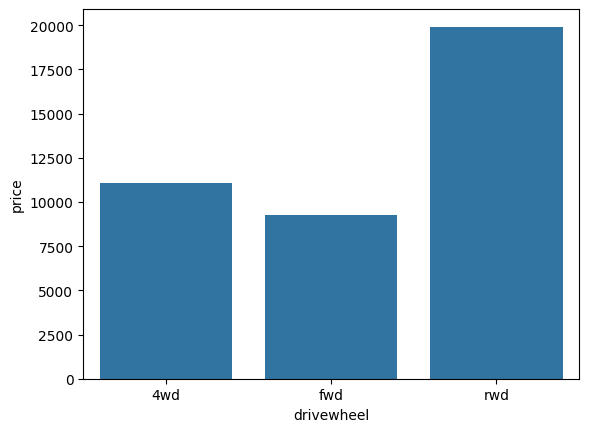

In [ ]:
sns.barplot(x='drivewheel',y='price',data=df_drivewheel)

## Enginelocation

In [ ]:
df_enginelocation = df.groupby('enginelocation')['price'].mean().reset_index()

<Axes: xlabel='enginelocation', ylabel='price'>

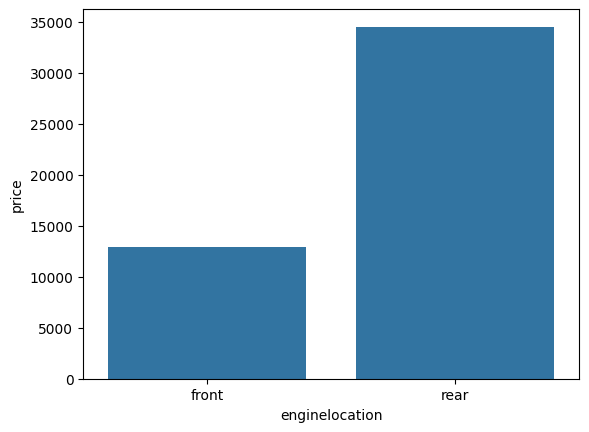

In [ ]:
sns.barplot(x='enginelocation',y='price',data=df_enginelocation)

## Wheelbase

<Axes: xlabel='wheelbase', ylabel='price'>

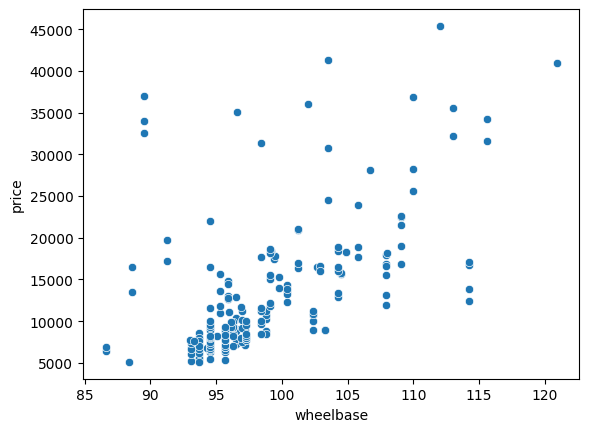

In [ ]:
sns.scatterplot(x='wheelbase',y='price',data=df)

In [ ]:
stats.pearsonr(df['wheelbase'],df['price'])

PearsonRResult(statistic=0.5778155982921501, pvalue=1.182820486337694e-19)

In [ ]:
1.182820486337694e-19 < 0.05

True

In [ ]:
# p <0.05 ==> Bác bỏ H0 ==> wheelbase và price có tương quan với nhau

## Carlength

<Axes: xlabel='carlength', ylabel='price'>

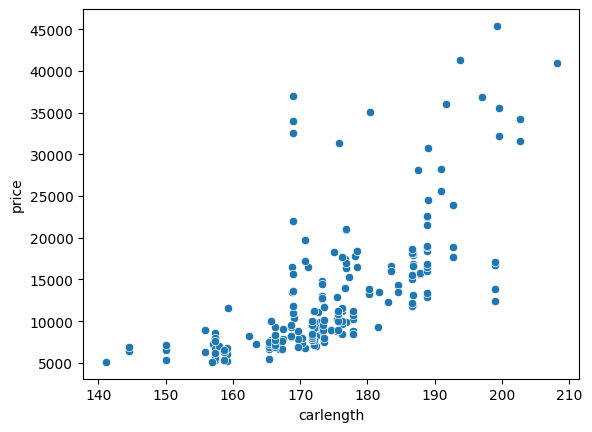

In [ ]:
sns.scatterplot(x='carlength',y='price',data=df)

In [ ]:
stats.pearsonr(df['carlength'],df['price'])

PearsonRResult(statistic=0.6829200156779621, pvalue=1.6787066240745445e-29)

In [ ]:
1.6787066240745445e-29 < 0.05

True

In [ ]:
# p <0.05 ==> Bác bỏ H0 ==> carlength và price có tương quan với nhau

## Carwidth

<Axes: xlabel='carwidth', ylabel='price'>

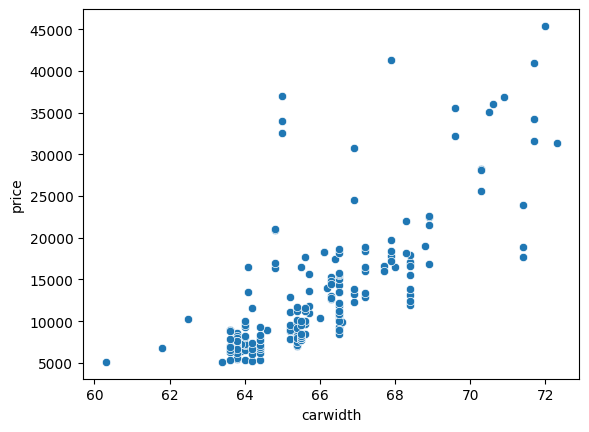

In [ ]:
sns.scatterplot(x='carwidth',y='price',data=df)

In [ ]:
stats.pearsonr(df['carwidth'],df['price'])

PearsonRResult(statistic=0.7593252997415115, pvalue=9.627437876118924e-40)

In [ ]:
9.627437876118924e-40 < 0.05

True

In [ ]:
# p < 0.05 ==> Bác bỏ H0 ==> carwidth và price có tương quan với nhau

## Carheight

<Axes: xlabel='carheight', ylabel='price'>

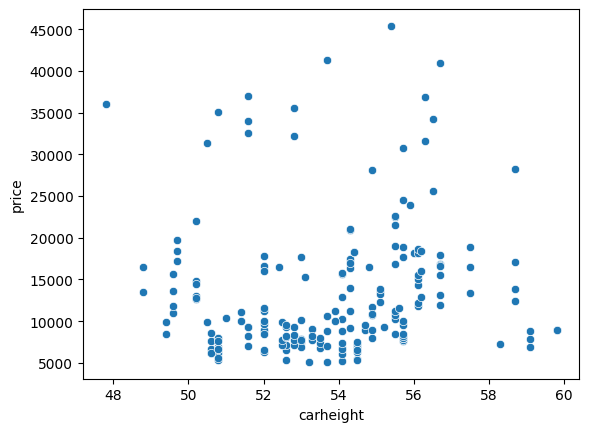

In [ ]:
sns.scatterplot(x='carheight',y='price',data=df)

In [ ]:
stats.pearsonr(df['carheight'],df['price'])

PearsonRResult(statistic=0.11933622657049445, pvalue=0.08832832352274969)

In [ ]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh carheight và price có tương quan với nhau

## Curbweight

<Axes: xlabel='curbweight', ylabel='price'>

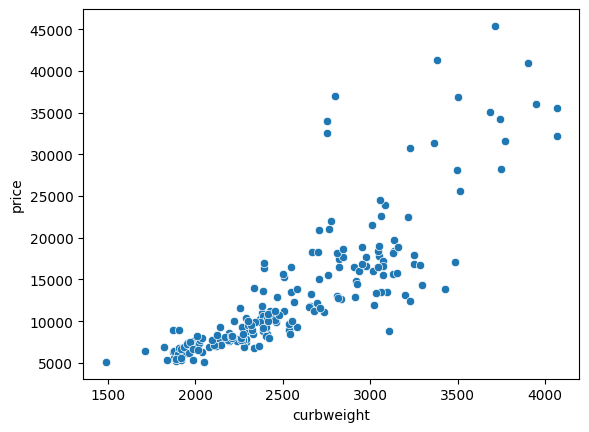

In [ ]:
sns.scatterplot(x='curbweight',y='price',data=df)

In [ ]:
stats.pearsonr(df['curbweight'],df['price'])

PearsonRResult(statistic=0.8353048793372968, pvalue=1.2144448264030345e-54)

In [ ]:
1.2144448264030345e-54 < 0.05

True

In [ ]:
# p<0.05 ==> Bác bỏ H0 ==> curbweight và price có tương quan với nhau

## Enginetype

In [ ]:
df_enginetype = df.groupby('enginetype')['price'].mean().reset_index()

<Axes: xlabel='enginetype', ylabel='price'>

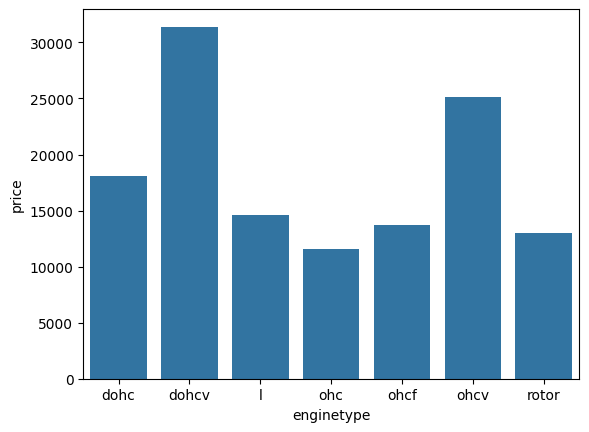

In [ ]:
sns.barplot(x='enginetype',y='price',data=df_enginetype)

## Cylindernumber

In [ ]:
df_cylindernumber = df.groupby('cylindernumber')['price'].mean().reset_index()

<Axes: xlabel='cylindernumber', ylabel='price'>

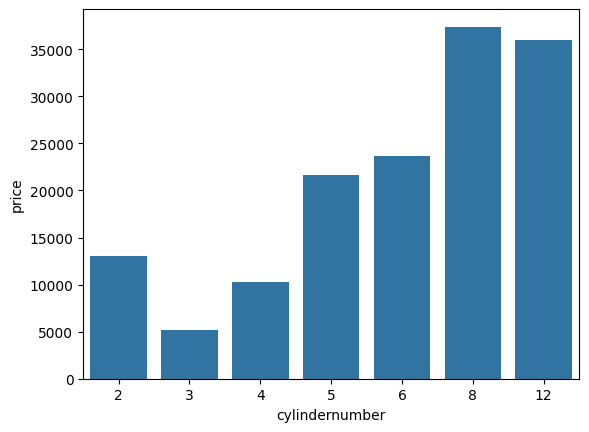

In [ ]:
sns.barplot(x='cylindernumber',y='price',data=df_cylindernumber)

## Enginesize

<Axes: xlabel='enginesize', ylabel='price'>

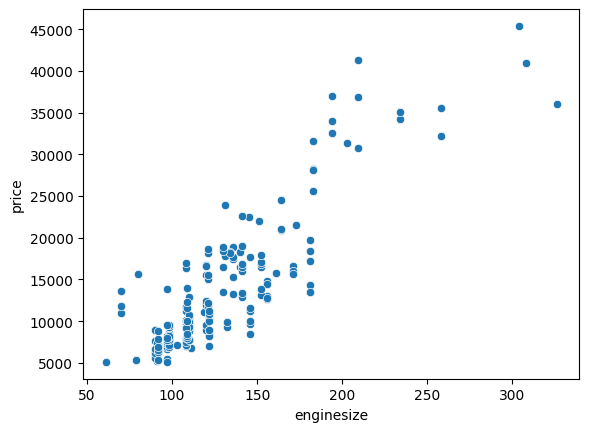

In [ ]:
sns.scatterplot(x='enginesize',y='price',data=df)

In [ ]:
stats.pearsonr(df['enginesize'],df['price'])

PearsonRResult(statistic=0.8741448025245117, pvalue=1.3547637598648963e-65)

In [ ]:
1.3547637598648963e-65 < 0.05

True

In [ ]:
# p < 0.05 ==> Bác bỏ H0 ==> enginesize và price có tương quan với nhau

## Fuelsystem

In [ ]:
df_fuelsystem = df.groupby('fuelsystem')['price'].mean().reset_index()

<Axes: xlabel='fuelsystem', ylabel='price'>

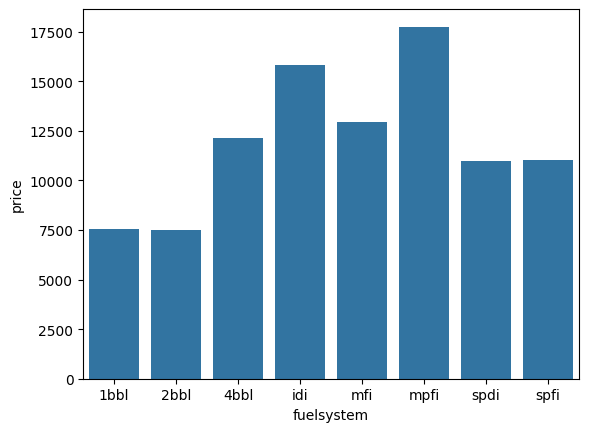

In [ ]:
sns.barplot(x='fuelsystem',y='price',data=df_fuelsystem)

## Boreratio

<Axes: xlabel='boreratio', ylabel='price'>

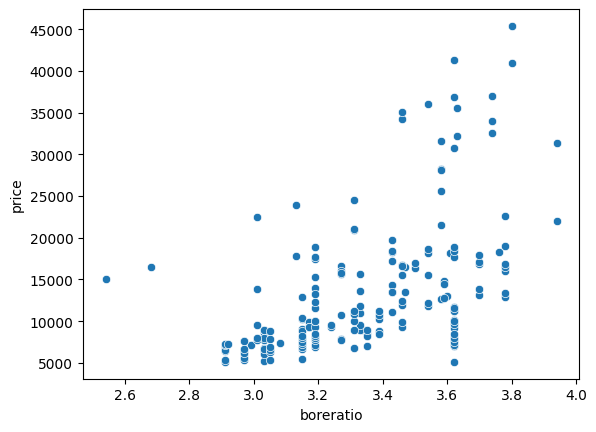

In [ ]:
sns.scatterplot(x='boreratio',y='price',data=df)

In [ ]:
stats.pearsonr(df['boreratio'],df['price'])

PearsonRResult(statistic=0.5531732367984437, pvalue=7.907922278248891e-18)

In [ ]:
7.907922278248891e-18 < 0.05

True

In [ ]:
# p < 0.05 ==> Bác bỏ H0 ==> boreratio và price có tương quan với nhau

## Stroke

<Axes: xlabel='stroke', ylabel='price'>

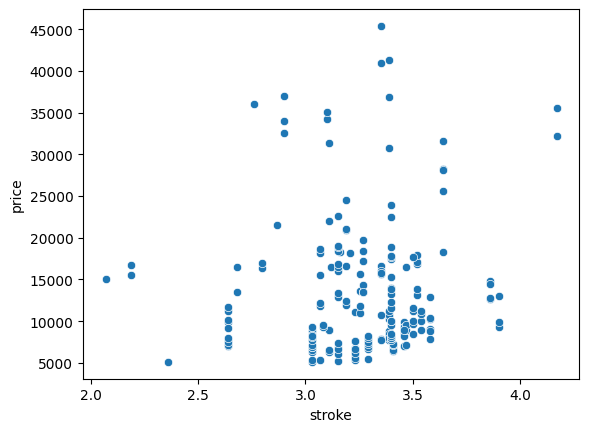

In [ ]:
sns.scatterplot(x='stroke',y='price',data=df)

In [ ]:
stats.pearsonr(df['stroke'],df['price'])

PearsonRResult(statistic=0.079443083881931, pvalue=0.2575137159090866)

In [ ]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh stroke và price có tương quan với nhau

## Compressionratio

<Axes: xlabel='compressionratio', ylabel='price'>

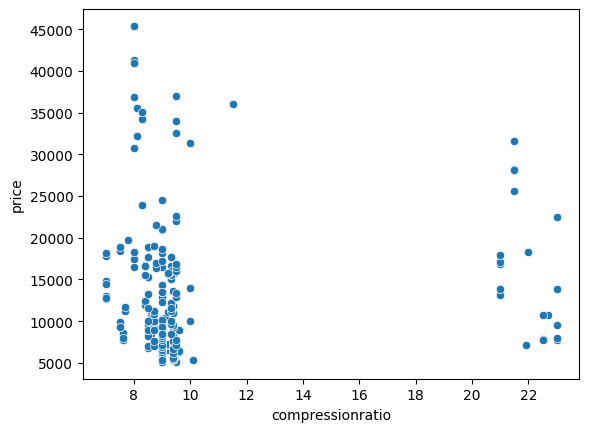

In [ ]:
sns.scatterplot(x='compressionratio',y='price',data=df)

In [ ]:
stats.pearsonr(df['compressionratio'],df['price'])

PearsonRResult(statistic=0.06798350579944264, pvalue=0.33277236122380593)

In [ ]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh compressionratio và price có tương quan với nhau

## Horsepower

<Axes: xlabel='horsepower', ylabel='price'>

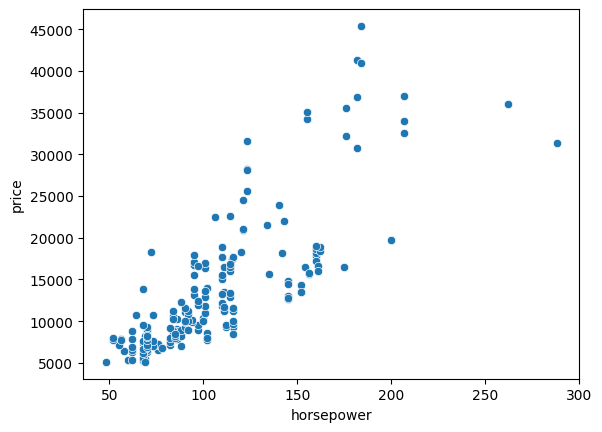

In [ ]:
sns.scatterplot(x='horsepower',y='price',data=df)

In [ ]:
stats.pearsonr(df['horsepower'],df['price'])

PearsonRResult(statistic=0.8081388225362216, pvalue=1.4834365732940885e-48)

In [ ]:
1.4834365732940885e-48 < 0.05

True

In [ ]:
# p < 0.05 ==> Bác bỏ H0 ==> horsepower và price có tương quan với nhau

## Peakrpm

<Axes: xlabel='peakrpm', ylabel='price'>

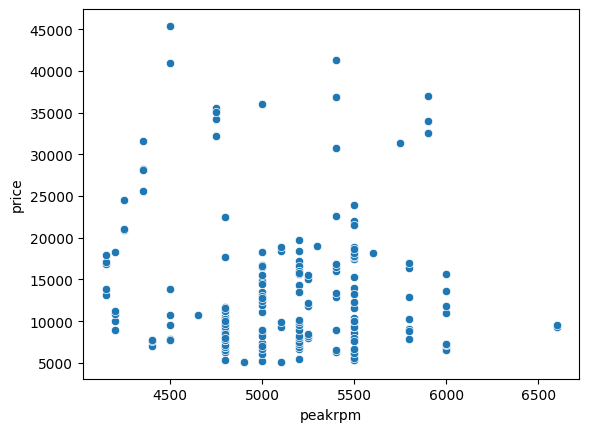

In [ ]:
sns.scatterplot(x='peakrpm',y='price',data=df)

In [ ]:
stats.pearsonr(df['peakrpm'],df['price'])

PearsonRResult(statistic=-0.08526715027785688, pvalue=0.22414123444666736)

In [ ]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh peakrpm và price có tương quan với nhau

## Citympg

<Axes: xlabel='citympg', ylabel='price'>

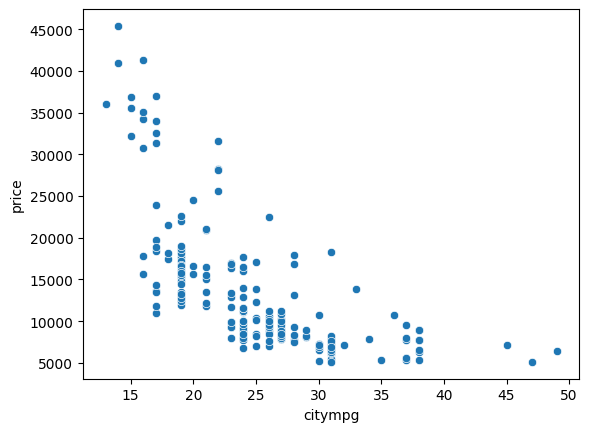

In [ ]:
sns.scatterplot(x='citympg',y='price',data=df)

In [ ]:
stats.pearsonr(df['citympg'],df['price'])

PearsonRResult(statistic=-0.6857513360270397, pvalue=7.978684249663508e-30)

In [ ]:
7.978684249663508e-30 < 0.05

True

In [ ]:
# p < 0.05 ==> Bác bỏ H0 ==> citympg và price có tương quan với nhau

## Highwaympg

<Axes: xlabel='highwaympg', ylabel='price'>

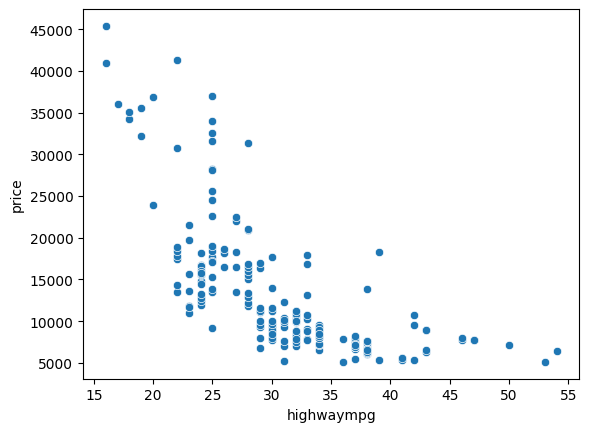

In [ ]:
sns.scatterplot(x='highwaympg',y='price',data=df)

In [ ]:
stats.pearsonr(df['highwaympg'],df['price'])

PearsonRResult(statistic=-0.6975990916465562, pvalue=3.230681380364674e-31)

In [ ]:
3.230681380364674e-31 < 0.05

True

In [ ]:
# p < 0.05 ==> Bác bỏ H0 ==> highwaympg và price có tương quan với nhau

## Brand

In [ ]:
df_Brand = df.groupby('Brand')['price'].mean().reset_index()

<Axes: xlabel='price', ylabel='Brand'>

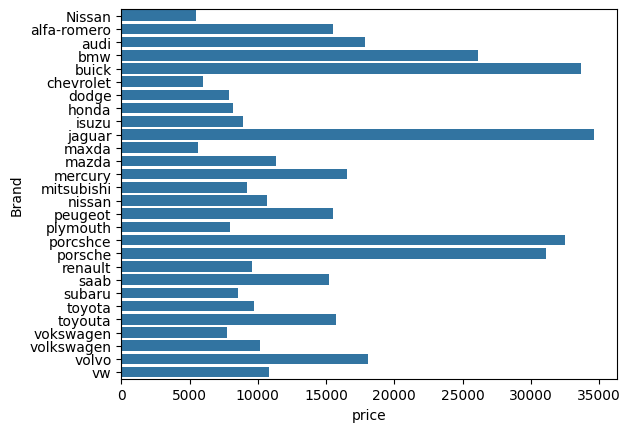

In [ ]:
sns.barplot(x='price',y='Brand',data=df_Brand)

## Symboling

<Axes: xlabel='symboling', ylabel='price'>

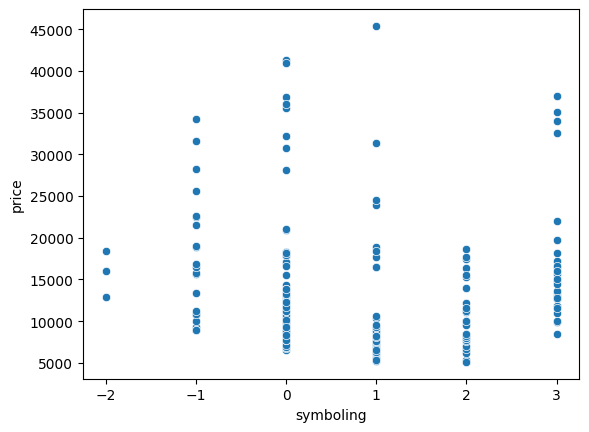

In [ ]:
sns.scatterplot(x='symboling',y='price',data=df)

In [ ]:
stats.pearsonr(df['symboling'],df['price'])

PearsonRResult(statistic=-0.07997822464270349, pvalue=0.2543117584863517)

In [ ]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh symboling và price có tương quan với nhau

# Nhận xét các thuộc tính gây ảnh hưởng tới giá

In [ ]:
# Các thuộc tính định tính đều gây ảnh hưởng đến giá xe ngoại trừ thuộc tính doornumber
# Các thuộc tính định lượng như carheight, stroke, compressionratio, peakrpm chưa đủ bằng chứng để kết luận có tương quan với giá xe
# Các thuộc tính định lượng như wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower đều có tương quan với giá xe và tương quan thuận
# Các thuộc tính định lượng như citympg, highwaympg tương quan với giá xe và tương quan nghịch

# Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa vào mô hình)

<Axes: >

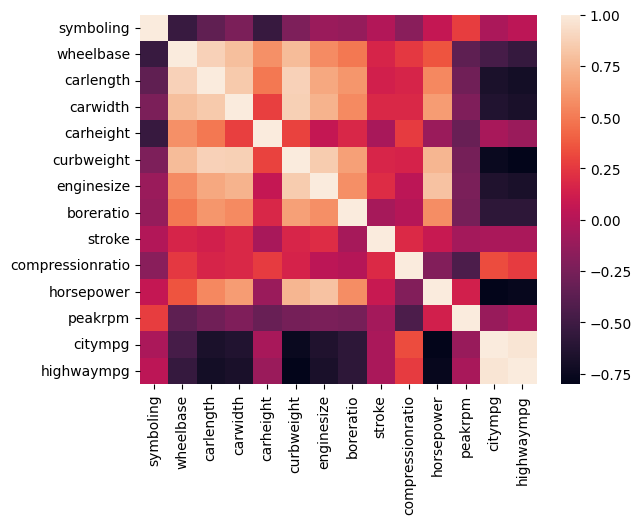

In [ ]:
sns.heatmap(df.drop(columns=['car_ID','CarName','fueltype','aspiration','carbody','drivewheel','Brand','fuelsystem','enginetype','enginelocation','doornumber','cylindernumber','price']).corr())

In [ ]:
test = df[['symboling',
                'wheelbase',
                'carlength',
                'carwidth',
                'carheight',
                'curbweight',
                'enginesize',
                'boreratio',
                'stroke',
                'compressionratio',
                'horsepower',
                'peakrpm',
                'citympg',
                'highwaympg']].corr()

In [ ]:
test = test[(test > 0.8) & (test < 1)]

In [ ]:
test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,NaN,NaN,0.874587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carlength,NaN,0.874587,NaN,0.841118,NaN,0.877728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carwidth,NaN,NaN,0.841118,NaN,NaN,0.867032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carheight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,NaN,NaN,0.877728,0.867032,NaN,NaN,0.850594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginesize,NaN,NaN,NaN,NaN,NaN,0.850594,NaN,NaN,NaN,NaN,0.809769,NaN,NaN,NaN
boreratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compressionratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## area voi bedroom co tuong quan voiw nhau

In [ ]:
x = df[['area','bedroom']]
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     78.04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.02e-24
Time:                        03:15:38   Log-Likelihood:                -1657.3
No. Observations:                 164   AIC:                             3321.
Df Residuals:                     161   BIC:                             3330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.955e+04   2344.548     16.868      0.000    3.49e+04    4.42e+04
highwaympg  -943.5843    301.082     -3.134      0.002   -1538.163    -349.006
citympg      122.5037    314.635      0.389      0.698    -498.841     743.848
==============================================================================
Omnibus:                       43.843   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.597
Skew:                           1.403   Prob(JB):                     4.68e-16
Kurtosis:                       4.568   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Giữ highwaympg và loại citympg

## wheelbase và carlength tương quan với nhau

In [ ]:
x = df[['are','toilet']]
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     69.53
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.71e-22
Time:                        03:15:45   Log-Likelihood:                -1661.8
No. Observations:                 164   AIC:                             3330.
Df Residuals:                     161   BIC:                             3339.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.157e+04   7824.324     -7.869      0.000    -7.7e+04   -4.61e+04
wheelbase   -224.7131    163.714     -1.373      0.172    -548.017      98.591
carlength    558.4561     81.603      6.844      0.000     397.305     719.607
==============================================================================
Omnibus:                       62.731   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.950
Skew:                           1.680   Prob(JB):                     4.53e-33
Kurtosis:                       6.242   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Giữ carlength bỏ wheelbase

## Carlength với carwidth với curbweight tương quan với nhau

In [ ]:
x = df[['land_certificate','house_direction','property_type']]
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     126.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           5.05e-42
Time:                        03:15:52   Log-Likelihood:                -1613.2
No. Observations:                 164   AIC:                             3234.
Df Residuals:                     160   BIC:                             3247.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.984e+04   1.79e+04     -2.780      0.006   -8.52e+04   -1.44e+04
carwidth     961.6662    339.680      2.831      0.005     290.832    1632.500
carlength   -200.8485     65.230     -3.079      0.002    -329.671     -72.026
curbweight    13.6198      1.612      8.451      0.000      10.437      16.802
==============================================================================
Omnibus:                       77.813   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.700
Skew:                           1.806   Prob(JB):                     1.70e-69
Kurtosis:                       8.771   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = df[['curbweight']]
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     343.7
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           6.81e-42
Time:                        03:15:57   Log-Likelihood:                -1619.5
No. Observations:                 164   AIC:                             3243.
Df Residuals:                     162   BIC:                             3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.009e+04   1870.129    -10.744      0.000   -2.38e+04   -1.64e+04
curbweight    13.0934      0.706     18.540      0.000      11.699      14.488
==============================================================================
Omnibus:                       64.668   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.065
Skew:                           1.514   Prob(JB):                     4.94e-50
Kurtosis:                       7.905   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# R-squared giảm 0.02 khi ta bỏ đi Carlength với carwidth là không đáng kể, vậy ta sẽ giữ curbweight và bỏ Carlength với carwidth

## Curbweight và enginesize tương quan với nhau

In [ ]:
x = df[['curbweight','enginesize']]
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     293.4
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.02e-54
Time:                        03:16:05   Log-Likelihood:                -1586.9
No. Observations:                 164   AIC:                             3180.
Df Residuals:                     161   BIC:                             3189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.424e+04   1673.680     -8.506      0.000   -1.75e+04   -1.09e+04
curbweight     4.9911      1.083      4.609      0.000       2.852       7.130
enginesize   117.1137     13.212      8.864      0.000      91.023     143.205
==============================================================================
Omnibus:                       26.426   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.884
Skew:                           0.797   Prob(JB):                     1.09e-10
Kurtosis:                       5.044   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Giữ enginesize và bỏ curbweight

## horsepower và enginesize tương quan với nhau

In [ ]:
x = df[['horsepower','enginesize']]
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     299.3
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           5.75e-55
Time:                        03:16:14   Log-Likelihood:                -1585.7
No. Observations:                 164   AIC:                             3177.
Df Residuals:                     161   BIC:                             3187.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8392.8482    964.054     -8.706      0.000   -1.03e+04   -6489.026
horsepower    60.9564     12.414      4.910      0.000      36.440      85.473
enginesize   121.8356     11.823     10.305      0.000      98.488     145.183
==============================================================================
Omnibus:                        6.375   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.912
Skew:                           0.248   Prob(JB):                       0.0191
Kurtosis:                       3.954   Cond. No.                         566.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Giữ enginesize và bỏ horsepower

## Tổng kết

In [ ]:
# Các thuộc tính còn lại bao gồm enginesize, boreratio, highwaympg
# Khi bỏ thuộc tính boreratio thì r_square không thay đổi
# Chỉ giữ lại 2 thuộc tính là enginesize và highwaympg

In [ ]:
x = df[['enginesize','highwaympg']]
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     281.1
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.99e-53
Time:                        03:16:21   Log-Likelihood:                -1589.7
No. Observations:                 164   AIC:                             3185.
Df Residuals:                     161   BIC:                             3195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2648.3101   2885.167      0.918      0.360   -3049.341    8345.961
enginesize   142.0832      9.885     14.373      0.000     122.562     161.605
highwaympg  -235.5437     60.328     -3.904      0.000    -354.681    -116.407
==============================================================================
Omnibus:                       13.051   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.128
Skew:                           0.531   Prob(JB):                     0.000315
Kurtosis:                       4.110   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 2 thuộc tính enginesize và highwaympg giải thích được 77,7% sự thay đổi của giá xe

# Tiến hành mã hóa tạo ra các biến dumy từ các biến category ( thang đo nominal ) ban đầu

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Brand'],
      dtype='object')

In [ ]:
df1 = pd.get_dummies(df.drop(['price','symboling','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower', 'peakrpm', 'citympg','car_ID','doornumber'], axis=1),
                     columns=['CarName','fueltype','aspiration',
                              'carbody','drivewheel','enginelocation',
                              'enginetype','fuelsystem','Brand'],
                     dtype='int')

In [ ]:
df1.head()

,cylindernumber,enginesize,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,...,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_toyouta,Brand_vokswagen,Brand_volkswagen,Brand_volvo,Brand_vw
0,4,130,27,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,130,27,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,152,26,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,109,30,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,136,22,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn

In [ ]:
x = df1
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
len(x_train)

164

In [ ]:
len(x_test)

41

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
coef = lr.coef_
intercept = lr.intercept_

In [ ]:
coef

array([-3.10672629e+03,  1.14208889e+02, -8.65384583e+01, -2.26531718e+03,
        4.14172102e+02, -3.12555622e+03, -1.20556221e+02, -2.81320298e+03,
        5.37191009e+02,  5.75486538e+03,  2.44985615e+03, -1.81764547e+02,
       -1.92280899e+03, -4.38778363e+03, -1.16567295e+02,  4.99007886e+03,
        4.01480194e+03, -5.03405317e-09,  3.21881733e+03,  3.99646785e+03,
       -3.40488120e+02, -2.56229943e+03, -5.51040102e-10, -7.13764713e+02,
        7.44615724e+03,  2.30884674e+03,  1.12299499e+03, -1.25055521e-10,
       -3.13248504e+02, -9.11346436e+02,  1.51265437e+02,  5.05167505e+02,
       -4.11832495e+02,  4.13820089e-11,  3.56976670e-10, -1.89354787e+03,
        4.84078555e-10,  3.26543711e+00, -3.94119188e+02, -1.12224610e+03,
       -1.82855509e-10,  5.85487214e-12,  1.01794856e+03, -3.89279328e+02,
       -7.27595761e-12,  2.44619574e+02, -7.27595761e-12, -1.05034403e+03,
        3.59729303e+02,  1.92476476e+03, -4.00370020e+03, -7.07665687e+02,
        9.09494702e-12,  

In [ ]:
intercept

21987.673091857432

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 3104.20027206,  5231.29921242,  6224.06794284,  7351.46454102,
        8773.09793186, 29291.15326349,  1000.6487515 ,  7304.85366239,
        6426.20820633, 10754.70631585, 18941.58714601, 13634.58647633,
       17886.74462006,  9017.24610239, 15565.00546264,  9487.72505925,
       11914.58463123,  6874.94763794, 20523.80413629, 12342.87705978,
       11476.41406402,  6528.79380483, 16430.        ,  8745.280539  ,
       13017.75431221,  6874.94763794, 15495.62958231,  6866.08210637,
        5831.61537483,  7753.04556979,  8880.61292036, 10748.15947282,
       26745.19805984, 12423.55030395, 16680.04164348,  8227.97524628,
       10728.64580194, 36257.66568709, 15768.73376058, 19416.68240672,
        5078.14274487])

In [ ]:
mean_absolute_error(y_test, y_pred)

2007.4434858809457

In [ ]:
mean_squared_error(y_test, y_pred)

10135763.760223312

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3183.6714278052177

In [ ]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
# Sai số khoảng 24%